In [21]:
import numpy as np
import pandas as pd
import datetime
import pandas_datareader
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib_venn import venn2
from pandas_datareader import wb # import WB API

In [22]:
# load wb data for energy production from fossil fuels 1975-2015
wb_fosl = wb.download(indicator='EG.ELC.FOSL.ZS', country=['EUU','NAC','SSA','TLA'], start=1975, end=2015)
wb_fosl = wb_fosl.rename(columns = {'EG.ELC.FOSL.ZS':'fosl'})
wb_fosl.reset_index(inplace = True)
wb_fosl.year = wb_fosl.year.astype(int)
wb_fosl.country = wb_fosl.country.astype(str)
wb_fosl = wb_fosl.sort_values(['country', 'year'])
wb_fosl.dropna() #drop all missing values
wb_fosl.reset_index(inplace=True, drop=True)
wb_fosl.info()

/Users/gw/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  164 non-null    object 
 1   year     164 non-null    int64  
 2   fosl     164 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ KB


In [23]:
import ipywidgets as widgets
def plot_wb(wb_fosl, country): 
    I = wb_fosl['country'] == country
    ax=wb_fosl.loc[I,:].plot(x='year', y='fosl', style='-o', legend=False)
    ax.set_ylabel('% of total')
    ax.set_title('Energy production from fossil fuels 1975-2015')

In [24]:
widgets.interact(plot_wb, 
    wb_fosl = widgets.fixed(wb_fosl),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_fosl.country.unique(), 
                                    value='European Union')
);

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

In [25]:
wb_rnwx = wb.download(indicator='EG.ELC.RNWX.ZS', country=['EUU', 'NAC', 'SSA', 'TLA'], start=1975, end=2015)
wb_rnwx = wb_rnwx.rename(columns = {'EG.ELC.RNWX.ZS':'rnwx'})
wb_rnwx = wb_rnwx.reset_index()
wb_rnwx.year = wb_rnwx.year.astype(int)
wb_rnwx.country = wb_rnwx.country.astype(str)
wb_rnwx = wb_rnwx.sort_values(['country', 'year'])
wb_rnwx.dropna()
wb_rnwx.reset_index(inplace=True, drop=True)
wb_rnwx.info()

/Users/gw/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EUU, NAC, SSA, TLA
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  164 non-null    object 
 1   year     164 non-null    int64  
 2   rnwx     164 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ KB


In [26]:
def plot_wb(wb_rnwx, country): 
    I = wb_rnwx['country'] == country
    ax = wb_rnwx.loc[I,:].plot(x='year', y='rnwx', style='-o', color='green', legend=True)
    ax.set_ylabel('% of total')
    ax.set_title('Energy production from renewable sources 1975-2015')

In [27]:
widgets.interact(plot_wb, 
    wb_rnwx = widgets.fixed(wb_rnwx),
    country = widgets.Dropdown(description='Country', 
                                    options=wb_rnwx.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

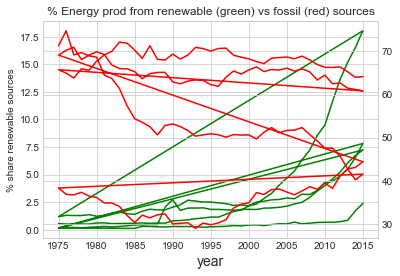

In [36]:
fig,ax=plt.subplots()
ax.plot(wb_rnwx.year, wb_rnwx.rnwx, color='green')
ax.set_xlabel("year",fontsize=14)
ax2=ax.twinx()
ax2.plot(wb_fosl.year, wb_fosl['fosl'], color='red')
ax.set_ylabel('% share renewable sources')
ax.set_xlabel('year')
ax.set_title('% Energy prod from renewable (green) vs fossil (red) sources')
plt.show()

In [29]:
wb = pd.merge(wb_fosl, wb_rnwx, on=['country', 'year'], how='left')
wb.dropna()
wb.rename(columns={'fosl':'f'}, inplace=True)
wb.rename(columns={'rnwx':'r'}, inplace=True)

In [30]:
wb

,country,year,f,r
0,European Union,1975,71.327626,0.558944
1,European Union,1976,74.799558,0.513907
2,European Union,1977,69.205318,0.519714
3,European Union,1978,69.726892,0.522394
4,European Union,1979,68.970388,0.507560
...,...,...,...,...
159,Sub-Saharan Africa (excluding high income),2011,66.277732,0.670913
160,Sub-Saharan Africa (excluding high income),2012,66.398879,0.730265
161,Sub-Saharan Africa (excluding high income),2013,65.269599,0.856317
162,Sub-Saharan Africa (excluding high income),2014,63.986604,1.701720


In [31]:
wb['prod_diff'] = wb.f - wb.r
wb

,country,year,f,r,prod_diff
0,European Union,1975,71.327626,0.558944,70.768682
1,European Union,1976,74.799558,0.513907,74.285651
2,European Union,1977,69.205318,0.519714,68.685604
3,European Union,1978,69.726892,0.522394,69.204498
4,European Union,1979,68.970388,0.507560,68.462828
...,...,...,...,...,...
159,Sub-Saharan Africa (excluding high income),2011,66.277732,0.670913,65.606819
160,Sub-Saharan Africa (excluding high income),2012,66.398879,0.730265,65.668614
161,Sub-Saharan Africa (excluding high income),2013,65.269599,0.856317,64.413281
162,Sub-Saharan Africa (excluding high income),2014,63.986604,1.701720,62.284884


In [32]:
import ipywidgets as widgets
def plot_wb(wb, country):
    I = wb['country'] == country
    ax = wb.loc[I,:].plot(x='year', y='prod_diff', style='-o', legend=False)
    ax.set_ylabel('%-point difference of total energy production')
    ax.set_title('Diff fossil minus renewable sources 1975-2015')

In [33]:
widgets.interact(plot_wb, 
    wb = widgets.fixed(wb),
    country = widgets.Dropdown(description='Country', 
                                    options=wb.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='Country', options=('European Union', 'Latin America & the Caribbea…

In [34]:
import ipywidgets as widgets
def plot_wb(wb_fosl, country): 
    I = wb_fosl['country'] == country
    ax=wb_fosl.loc[I,:].plot(x='year', y='fosl', style='-o', legend=False)
    ax.set_ylabel('% of total')
    ax.set_title('Energy production from fossil fuels 1975-2015')

In [35]:
# From the figure above, we observe that across regions, the share of total energy production from renewable sources has steadily increased since the 1970s, with the exception of Latin America and the Carribbean. Indeed, the latter shows an increasing trend in energy production from fossil fuels. This is in line with observations in covered in the news (https://dialogochino.net/en/climate-energy/43661-latin-america-continues-expansion-of-fossil-fuels-despite-climate-change/). The trend of increasing use of renewable sources is represented by the converging difference. Notably, the EU has the highest % share of energy production from renewables and the SSA the lowest. In sum, the challenge of equal access to clean and affordable energy stipulated by SDG 7 remains highly challenged. 